In [1]:
from ModelResult import ModelResult

Model results can work as they did before with one small change that I do not automatically find all the files. This is because sometimes we will want a model to be a 'shell' and only really serve as a parent for child models.

In [2]:
clm4 = ModelResult("/home/ncf/CLM/CLM4.0",name="CLM4").findFiles()
clm5 = ModelResult("/home/ncf/CLM/CLM5.0",name="CLM5").findFiles()

A model could also be a group / collection of models. You could use this to define a collection, like a MIP or to define an ensemble. There is a manual addition of models to the group, seen here:

In [3]:
grp = ModelResult("/home/ncf/CLM/",name="CLM - manual")
grp.addModel(clm4)
grp.addModel([clm4,clm5]) # can add lists too, won't duplicate
print(grp)

ModelResult: CLM - manual
-------------------------
  + CLM4
  + CLM5



But there is also a syntax for defining model groups by regular expressions. First I create a model result and run the `findFiles()` but I specify a regular expression. The code will loop through all netCDF files in the model group directory and if a match for this regular expression is found, it will add the variables of that netCDF file to a new model with the name of what is in the parenthesis.

In [4]:
grp = ModelResult("/home/ncf/CLM/",name="CLM - automatic")
grp.findFiles(group_regex=".*_(.*)_historical.*")
print(grp)

ModelResult: CLM - automatic
----------------------------
  + CLM40r243CMIP6GSWP3
  + CLM50r267GSWP3
  + CLM45r270GSWP3



The model names are picked off of the filenames. You can quickly imagine how useful this could be for sorting out CMIP-style ensembles. The `r1i1p1f1` is always in the same relative place of the filename. You could setup an ILAMB model ensemble very quickly this way. Then you can get variables out of models jsut like before:

In [5]:
nbp = clm4.getVariable("nbp")
print(nbp)

Variable: nbp
-------------
                unit: kg m-2 s-1
          isTemporal: True (1932)
           isSpatial: True (192,288)
           isLayered: False
          nDatasites: N/A
           dataShape: (1932, 192, 288)
             dataMax: 5.861439e-08
             dataMin: -1.318722e-07
            dataMean: -5.798144e-11



But if you ask a model group, you will get a dictionary of variables:

In [6]:
nbps = grp.getVariable("nbp")
for mname in nbps.keys():
    print(mname,nbps[mname])

CLM40r243CMIP6GSWP3 Variable: nbp
-------------
                unit: kg m-2 s-1
          isTemporal: True (1932)
           isSpatial: True (192,288)
           isLayered: False
          nDatasites: N/A
           dataShape: (1932, 192, 288)
             dataMax: 5.861439e-08
             dataMin: -1.318722e-07
            dataMean: -5.798144e-11

CLM50r267GSWP3 Variable: nbp
-------------
                unit: kg m-2 s-1
          isTemporal: True (1932)
           isSpatial: True (192,288)
           isLayered: False
          nDatasites: N/A
           dataShape: (1932, 192, 288)
             dataMax: 1.043090e-07
             dataMin: -4.399326e-07
            dataMean: -1.276678e-11

CLM45r270GSWP3 Variable: nbp
-------------
                unit: kg m-2 s-1
          isTemporal: True (1980)
           isSpatial: True (192,288)
           isLayered: False
          nDatasites: N/A
           dataShape: (1980, 192, 288)
             dataMax: 8.961334e-08
             dataMin: -9

If you add the keyword, `mean=True`, then ILAMB will also give you a mean that has the standard deviation across models encoded as uncertainty.

In [7]:
nbps,mean = grp.getVariable("nbp",mean=True)

In [8]:
print(mean)

Variable: nbp
-------------
                unit: kg m-2 s-1
          isTemporal: True (1932)
           isSpatial: True (192,288)
           isLayered: False
          nDatasites: N/A
           dataShape: (1932, 192, 288)
             dataMax: 5.602857e-08
             dataMin: -3.335447e-07
            dataMean: -8.624030e-12



So we could use this to operate on output from the LMT:

In [11]:
lmt = ModelResult("/lmt/elm_rlts/rawoutput/LMT_MulInst84_US-UMB_I20TRCNPRDCTCBC",name="LMT")
lmt.findFiles(group_regex=".*clm2_(.*)\.h0\..*")
print(lmt)

ModelResult: LMT
----------------
  + 0001
  + 0002
  + 0003
  + 0004
  + 0005
  + 0006
  + 0007
  + 0008
  + 0009
  + 0010
  + 0015
  + 0016
  + 0017
  + 0018
  + 0019
  + 0020
  + 0021
  + 0022
  + 0023
  + 0024
  + 0025
  + 0026
  + 0027
  + 0028
  + 0029
  + 0030
  + 0031
  + 0032
  + 0033
  + 0034
  + 0035
  + 0037
  + 0038
  + 0039
  + 0040
  + 0041
  + 0042
  + 0043
  + 0044
  + 0045
  + 0046
  + 0047
  + 0048
  + 0049
  + 0050
  + 0051
  + 0052
  + 0053
  + 0054
  + 0055
  + 0056
  + 0077
  + 0078
  + 0079
  + 0080
  + 0081
  + 0082
  + 0083
  + 0084
  + 0057
  + 0058
  + 0059
  + 0060
  + 0061
  + 0062
  + 0063
  + 0064
  + 0065
  + 0066
  + 0067
  + 0068
  + 0069
  + 0070
  + 0071
  + 0072
  + 0073
  + 0074
  + 0075
  + 0076
  + 0011
  + 0012
  + 0013
  + 0014
  + 0036



In [14]:
gpps,mean_gpp = lmt.getVariable("GPP",mean=True)

In [15]:
print(mean_gpp)

Variable: GPP
-------------
                unit: g/m^2/s
          isTemporal: True (180)
           isSpatial: False
           isLayered: False
          nDatasites: N/A
           dataShape: (180,)
             dataMax: 1.082807e-04
             dataMin: 0.000000e+00
            dataMean: 3.220472e-05



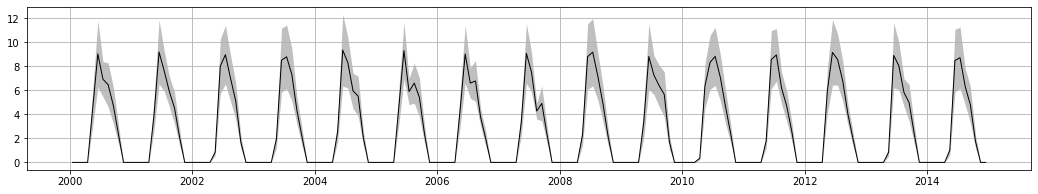

In [26]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(18,3))
mean_gpp.convert("g m-2 d-1")
mean_gpp.plot(ax)
plt.show()